# Machine Learning with Python

## 1.5 Homework

### 0

Find a dataset that interests you that will be suitable for *supervised learning*:

At least one of the variables should be a *target* value that would be interesting to predict.
This will be either
* a class label (for classification) or 
* a numerical value (for regression)

There should be sufficient features to make the problem interesting - at least 4 non-target columns.

There should be sufficient data points to allow for meaningful cross-validation - at least 100 rows.

Your dataset could be loaded directly from [OpenML](https://www.openml.org/home) or from a CSV file that you have prepared.

In [18]:
from sklearn.datasets import fetch_openml
iris = fetch_openml(name='iris')
iris.keys()

/usr/lib/python3.10/site-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name iris exist. Versions may be fundamentally different, returning version 1.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [19]:
iris.target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=1
)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_scaled = scaler.transform(X_train)

### 1

Produce a visualisation of the whole dataset using a dimensionality reduction technique of your choice.

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


Original shape: (112, 4)
Reduced shape: (112, 2)


In [23]:
import pandas as pd

categories = pd.unique(y_train)

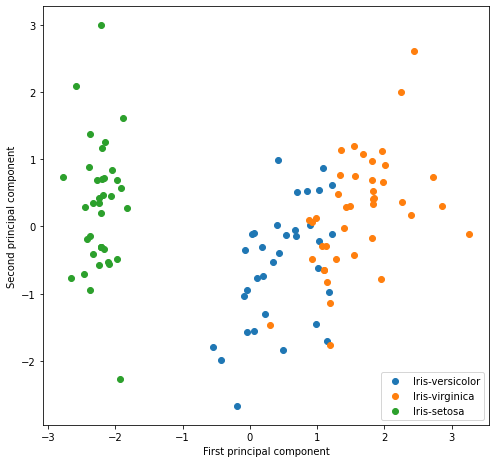

In [24]:
import matplotlib.pyplot as plt

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
plt.scatter(
    X_pca[y_train == categories[0], 0], X_pca[y_train == categories[0], 1], label=categories[0]
)
plt.scatter(
    X_pca[y_train == categories[1], 0], X_pca[y_train == categories[1], 1], label=categories[1]
)
plt.scatter(
    X_pca[y_train == categories[2], 0], X_pca[y_train == categories[2], 1], label=categories[2]
)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.show()


### 2
Apply a clustering algorithm to the data and evaluate the results in an appropriate way.

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

clusters = kmeans.labels_

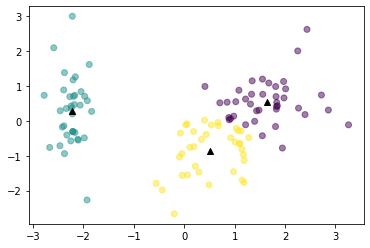

In [26]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, alpha=0.5)
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    c='k',
    marker='^')
plt.show()

In [30]:
from sklearn.metrics.cluster import adjusted_rand_score

# ? Auto mappings?
ari = adjusted_rand_score(y_train, clusters)

print(ari)

0.6258731179457614
